In [55]:
%load_ext snakeviz
%load_ext line_profiler
%load_ext heat

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [10]:
import pixiedust

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel
Table USER_PREFERENCES created successfully
Table service_connections created successfully


In [60]:
import json
with open('testcases/RectangeTest01.txt', 'r') as f:
  rectangles = json.load(f)

In [ ]:
import json
with open('testcases/RectangeTest02.txt', 'r') as f:
  rectangles = json.load(f)

In [22]:
from line_profiler import LineProfiler
import json
from typing import List

# Example 1
rectangles = [
    [1, 1, 3, 3],
    [3, 1, 4, 2],
    [3, 2, 4, 4],
    [1, 3, 2, 4],
    [2, 3, 3, 4]
]

# Example 2
# rectangles = [
#     [1, 1, 2, 3],
#     [1, 3, 2, 4],
#     [3, 1, 4, 2],
#     [3, 2, 4, 4]
# ]

# Example 4
rectangles = [
    [1, 1, 3, 3],
    [3, 1, 4, 2],
    [1, 3, 2, 4],
    [2, 2, 4, 4]
]

# case 1
rectangles = [[1,1,3,3],[3,1,4,2],[3,2,4,4],[1,3,2,4],[2,3,3,4]]

# rectangles = [[0, 0, 4, 1], [7, 0, 8, 2], [6, 2, 8, 3], [5, 1, 6, 3], [4, 0, 5, 1], [
#     6, 0, 7, 2], [4, 2, 5, 3], [2, 1, 4, 3], [0, 1, 2, 2], [0, 2, 2, 3], [4, 1, 5, 2], [5, 0, 6, 1]]

In [ ]:
def isRectangleCover(rectangles: List[List[int]]) -> bool:
  z = zip(*rectangles)
  loX = min(z.__next__())
  loY = min(z.__next__())
  hiX = max(z.__next__())
  hiY = max(z.__next__())
  # print(loX, loY, hiX, hiY)
  # if hiX-loX != hiY-loY:
  #   return False

  fields = set([(i, j) for i in range(loX, hiX) for j in range(loY, hiY)])

  for r in rectangles:
    for f in [(i, j) for i in range(r[0], r[2]) for j in range(r[1], r[3])]:
      if f not in fields:
        return False
      fields.remove(f)

  return not fields


# x = isRectangleCover(rectangles)
# print(x)

In [64]:
# %%snakeviz
def pi_approximate(n):
    step = 1.0 / n
    result = 0   
    for i in range(n):
        x = (i + 0.5) * step
        result += 4.0 / (1.0 + x * x)
    return step * result
pi_approximate(10)

3.1424259850010987

11000
0 0 5500 5501


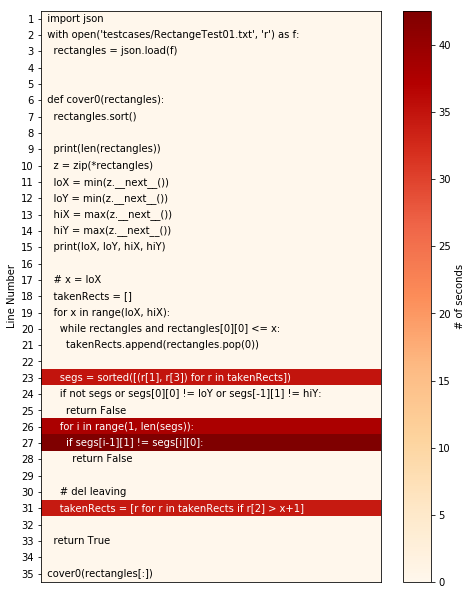

In [63]:
%%heat
import json
with open('testcases/RectangeTest01.txt', 'r') as f:
  rectangles = json.load(f)


def cover0(rectangles):
  rectangles.sort()

  print(len(rectangles))
  z = zip(*rectangles)
  loX = min(z.__next__())
  loY = min(z.__next__())
  hiX = max(z.__next__())
  hiY = max(z.__next__())
  print(loX, loY, hiX, hiY)

  # x = loX
  takenRects = []
  for x in range(loX, hiX):
    while rectangles and rectangles[0][0] <= x:
      takenRects.append(rectangles.pop(0))

    segs = sorted([(r[1], r[3]) for r in takenRects])
    if not segs or segs[0][0] != loY or segs[-1][1] != hiY:
      return False
    for i in range(1, len(segs)):
      if segs[i-1][1] != segs[i][0]:
        return False

    # del leaving
    takenRects = [r for r in takenRects if r[2] > x+1]

  return True

cover0(rectangles[:])

In [65]:
%lprun -f cover0 cover0(rectangles[:])

11000
0 0 5500 5501


In [68]:
%%time
def cover_bool_array(rectangles):
  rectangles.sort()

  print(len(rectangles))
  z = zip(*rectangles)
  loX = min(z.__next__())
  loY = min(z.__next__())
  hiX = max(z.__next__())
  hiY = max(z.__next__())
  print(loX, loY, hiX, hiY)

  # x = loX
  takenRects = []
  col = [False] * (hiY-loY)

  for x in range(loX, hiX):
    currRects = []
    while rectangles and rectangles[0][0] <= x:
      currRects.append(rectangles.pop(0))

    for r in currRects:
      if any(col[r[1]-loY:r[3]-loY]):
        return False
      col[r[1]-loY:r[3]-loY] = [True] * (r[3]-r[1])

    if not all(col):
      return False

    takenRects += currRects

    # mark leaving
    for r in takenRects:
      if r[2] <= x+1:
        col[r[1]-loY:r[3]-loY] = [False] * (r[3]-r[1])

    takenRects = [r for r in takenRects if r[2] > x+1]

  return True
cover_bool_array(rectangles[:])

11000
0 0 5500 5501
Wall time: 3.21 s


In [69]:
%%time
def cover_set(rectangles):
  rectangles.sort()

  print(f'# Rectangles: {len(rectangles)}')
  z = zip(*rectangles)
  loX = min(z.__next__())
  loY = min(z.__next__())
  hiX = max(z.__next__())
  hiY = max(z.__next__())
  print(f'Size: {(loX, loY, hiX, hiY)}')

  # x = loX
  takenRects = []
  # col = [False] * (hiY-loY)
  col = set()
  for x in range(loX, hiX):
    currRects = []
    while rectangles and rectangles[0][0] <= x:
      currRects.append(rectangles.pop(0))

    for r in currRects:
      s = set(range(r[1], r[3]))
      if col.intersection(s):
        return False
      col = col.union(s)

    if len(col) < hiY-loY:
      return False

    takenRects += currRects

    # mark leaving
    for r in takenRects:
      if r[2] <= x+1:
        s = set(range(r[1], r[3]))
        col = col - s

    takenRects = [r for r in takenRects if r[2] > x+1]

  return True
cover_set(rectangles[:])

# Rectangles: 11000
Size: (0, 0, 5500, 5501)
Wall time: 4.93 s


In [67]:
%%time 
def cover_segment_set(rectangles):
  rectangles.sort()

  print(len(rectangles))
  z = zip(*rectangles)
  loX = min(z.__next__())
  loY = min(z.__next__())
  hiX = max(z.__next__())
  hiY = max(z.__next__())
  print(loX, loY, hiX, hiY)

  takenRects = []
  # col = [False] * (hiY-loY)
  segs = []
  for x in range(loX, hiX):
    currRects = []
    while rectangles and rectangles[0][0] <= x:
      currRects.append(rectangles.pop(0))
    takenRects += currRects
    
    segs += [(r[1], r[3]) for r in currRects]

    if not segs: #or segs[0][0] != loY or segs[-1][1] != hiY:
      return False
    starts = set([s[0] for s in segs]+[hiY]) 
    stops = set([s[1] for s in segs]+[loY])
    intersections = starts & stops 
    if len(intersections)-1 != len(segs):
      return False

    for i in range(len(takenRects)-1,-1,-1):
      if takenRects[i][2] == x+1:
        segs.remove((takenRects[i][1],takenRects[i][3]))
        del takenRects[i]

    # del leaving
    # takenRects = [r for r in takenRects if r[2] > x+1]

  return True
cover_segment_set(rectangles[:])

11000
0 0 5500 5501
Wall time: 5.73 s


In [ ]:
%%pixie_debugger 


In [70]:
from sortedcontainers import SortedList

In [76]:
s = SortedList()
s.add((4,5))
s.add((0,5))
s.add((9,3))

s

SortedList([(0, 5), (4, 5), (9, 3)])

In [80]:
%%time
from bisect import bisect_right

class SegmentCollection:
  def __init__(self):
    self.s = []
  def add(self, el):
    pos = bisect_right(self.s,el)
    if pos > 0 and self.s[pos-1][1] == el[0] and pos < len(self.s) and self.s[pos][0] == el[1]:
      self.s[pos-1][1] = self.s[pos][1]
      del self.s[pos]
    elif pos > 0 and self.s[pos-1][1] == el[0]:
      self.s[pos-1][1] = el[1]
    elif pos < len(self.s) - 1 and self.s[pos][0] == el[1]:
      self.s[pos][0] = el[0]
    else:
      self.s.insert(pos,el)
  

def cover_segment_collection(rectangles):
  rectangles.sort()

  print(len(rectangles))
  z = zip(*rectangles)
  loX = min(z.__next__())
  loY = min(z.__next__())
  hiX = max(z.__next__())
  hiY = max(z.__next__())
  print(loX, loY, hiX, hiY)

  takenRects = []
  # col = [False] * (hiY-loY)
  missingSegs = SegmentCollection()
  missingSegs.add([loY,hiY])

  for x in range(loX, hiX):
    currRects = []
    while rectangles and rectangles[0][0] <= x:
      currRects.append(rectangles.pop(0))


    segs = SegmentCollection()
    for r in currRects:
      segs.add([r[1],r[3]])

    if str(segs.s) != str(missingSegs.s):
      return False

    takenRects += currRects
    missingSegs.s = []
    for i in range(len(takenRects)-1,-1,-1):
      if takenRects[i][2] == x+1:
        missingSegs.add([takenRects[i][1],takenRects[i][3]])
        del takenRects[i]

    # del leaving
    # takenRects = [r for r in takenRects if r[2] > x+1]

  return True


with open('testcases/RectangeTest01.txt', 'r') as f:
  rectangles = json.load(f)

print(cover_segment_collection(rectangles))

11000
0 0 5500 5501
True
Wall time: 1.97 s
